# Acces to Huggin Face

In [ ]:
from huggingface_hub import login
login("TOKEN")

# Data

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline
import torch
import pandas as pd

2025-07-29 18:12:41.784303: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753812761.808262     108 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753812761.815780     108 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using device:", device)

Using device: cuda


In [ ]:
URL = 'https://raw.githubusercontent.com/Christian-F-Badillo/Profesor_Resume/refs/heads/master/data/reviews_plus_score.csv'
data = pd.read_csv(URL)

data.head(10)

,profesor,fecha,comentario,calidad_general,facilidad,review,rating
0,"Abrego González, Leticia",31/Jul/2015,nunca asiste o llega tarde se la pasa comiendo...,4.0,8.0,nunca asiste o llega tarde se la pasa comiendo...,1 star
1,"Abrego González, Leticia",09/Jul/2015,"casi nunca va, y cuando va deja tareas en equi...",6.0,10.0,"casi nunca va, y cuando va deja tareas en equi...",1 star
2,"Abrego González, Leticia",25/Jul/2014,"Es una maestra pésima, me tocó en la práctica ...",2.0,6.0,"Es una maestra pésima, me tocó en la práctica ...",1 star
3,"Abrego González, Leticia",08/Jul/2014,"No asiste, no le interesa que aprendas, no te ...",3.0,6.0,"No asiste, no le interesa que aprendas, no te ...",1 star
4,"Abrego González, Leticia",08/Jul/2014,"No asiste, no le interesa que aprendas, no te ...",3.0,6.0,"No asiste, no le interesa que aprendas, no te ...",1 star
5,"Abrego González, Leticia",01/Jul/2014,Se nota su falta de interés. Obviamente no apr...,2.0,8.0,Se nota su falta de interés. Obviamente no apr...,1 star
6,"Abrego González, Leticia",01/Jul/2014,Se nota su falta de interés. Obviamente no apr...,2.0,8.0,Se nota su falta de interés. Obviamente no apr...,1 star
7,"Abrego González, Leticia",12/Jun/2014,"Es pésima, no asiste, es desinteresada, muy fl...",2.0,10.0,"Es pésima, no asiste, es desinteresada, muy fl...",1 star
8,"Abrego González, Leticia",12/Jun/2014,"Es pésima, no asiste, es desinteresada, muy fl...",2.0,10.0,"Es pésima, no asiste, es desinteresada, muy fl...",1 star
9,"Abrego González, Leticia",08/Jul/2014,"No asiste, no le interesa que aprendas, no te ...",3.0,6.0,"No asiste, no le interesa que aprendas, no te ...",1 star


In [ ]:
profesors = data['profesor'].unique()
print("Hay un total de", len(profesors), "profesores")

Hay un total de 656 profesores


In [ ]:
merge_reviews = data.groupby("profesor")['comentario'].apply(lambda x: ' '.join(x)).reset_index()
merge_reviews.head(15)

,profesor,comentario
0,"A. Mason, Tere",Ni siquiera da ella las clases. No recomiendo....
1,"AVILA CALDERON, JOSE LUIS SALVADOR","Es un excelente profesor, muy accesible y sus ..."
2,"Abrego González, Leticia",nunca asiste o llega tarde se la pasa comiendo...
3,"Acosta Galván, Samuel","Aprenderás mucho sobre psicología jurídica, qu..."
4,"Acuña, Laura","Es de esas clases que son muy relajadas, PERO ..."
5,"Aguayo, Alejandra",Solo diré que si tuviera la oportunidad de nun...
6,"Aguilar Arredondo, Andrea","excelente profesora, muy clara en sus explicac..."
7,"Aguilar Nery, Jesús",Como profesor es bueno. Sus clases son amenas ...
8,"Aguilar Ribera, UNIBERCIDAD.AUTÓNOMA DE MEXICO",Juntos iniciamos la escuela superior tratando ...
9,"Alburquerque, Carlos",Clase de primer semestre (creo que todos los p...


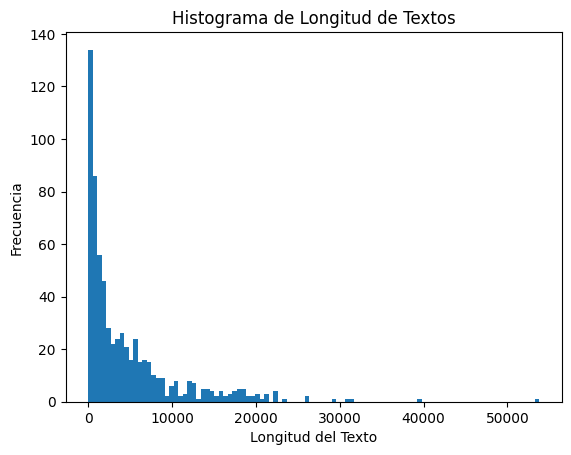

In [ ]:
import matplotlib.pyplot as plt

# Histograma de longitud de Textos
len_text = [len(text) for text in merge_reviews['comentario']]
plt.hist(len_text, bins=100)
plt.xlabel('Longitud del Texto')
plt.ylabel('Frecuencia')
plt.title('Histograma de Longitud de Textos')
plt.show()

In [ ]:
pd.DataFrame(len_text).describe()

,0
count,656.000000
mean,4675.477134
std,5992.733949
min,19.000000
25%,697.500000
50%,2257.000000
75%,6312.500000
max,53772.000000


# Resumen

- Se usará un modelo [mT5_multilingual_XLSum](https://huggingface.co/csebuetnlp/mT5_multilingual_XLSum) alojado en [Huggin Face](https://huggingface.co/).

In [ ]:
!pip install transformers accelerate einops bitsandbytes

In [ ]:
model_id = "CohereLabs/c4ai-command-r7b-12-2024"
device = 0 if torch.cuda.is_available() else -1

tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForCausalLM.from_pretrained(
    model_id,
    device_map="auto",
    torch_dtype=torch.float16,
    load_in_4bit=True  # Ahorra memoria en Colab
)

The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.


model.safetensors.index.json:   0%|          | 0.00/21.0k [00:00<?, ?B/s]

Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/178 [00:00<?, ?B/s]

In [ ]:
pipe = pipeline("text-generation", model=model, tokenizer=tokenizer)

Device set to use cuda:0


In [ ]:
def fragmentar_texto(texto, max_tokens=100000):
    tokens = tokenizer.encode(texto)
    fragmentos = [tokens[i:i+max_tokens] for i in range(0, len(tokens), max_tokens)]
    return [tokenizer.decode(chunk, skip_special_tokens=True) for chunk in fragmentos]

# Resume un solo fragmento
def resumir_fragmento(texto_fragmento):
    prompt = f"Resume el siguiente texto de forma clara, concisa, unificada y coherente:\n\n{texto_fragmento}\n\nResumen:"
    salida = pipe(prompt, max_new_tokens=500, do_sample=True, temperature=0.7, top_p=0.9)[0]['generated_text']

    return salida

# Aplica resumen jerárquico
def resumen_jerarquico(texto):
    fragmentos = fragmentar_texto(texto)
    print(f"🔹 Fragmentos creados: {len(fragmentos)}")

    resúmenes = []
    for i, frag in enumerate(fragmentos):
        print(f"🔸 Resumiendo fragmento {i+1}/{len(fragmentos)}...")
        resumen = resumir_fragmento(frag)
        resúmenes.append(resumen)

    if len(resúmenes) > 1:
        print("🔸 Generando meta-resumen final...")
        resumen_final = resumir_fragmento(" ".join(resúmenes))
        return resumen_final
    else:
        return resúmenes[0]

In [ ]:
# From last n resumenes
restantes = merge_reviews['comentario'].iloc[401:]
restantes = restantes.tolist()
print(f"Restantes: {len(restantes)} de {len(merge_reviews)}")

Restantes: 255 de 656


In [ ]:
resumenes = []

for i, texto_demo in enumerate(restantes):
    print(f"\n🔹 Procesando comentario {i+1}/{len(restantes)}...")
    print("🔸 Texto original:\n")
    print(texto_demo)

    try:
        resumen = resumen_jerarquico(texto_demo)  # o resumir_fragmento()
        resumenes.append(resumen)

        print("\n✅ RESUMEN FINAL:\n")
        print(resumen)

    except Exception as e:
        resumenes.append("ERROR")
        print(f"\n❌ Error al resumir el comentario {i+1}: {e}")

# Añade la columna al DataFrame original
merge_reviews["resumen"] = resumenes


🔹 Procesando comentario 1/255...
🔸 Texto original:

Pésimo Es bien tierno, cuenta historias interesantes... es como un abuelito contando sus crónicas, pero no enseña nada XD SI QUIERES PASAR CON 10 Y NO APRENDER NADA ES LA OPCIÓN ;) El profesor sabe mucho, desafortunadamente no sabe como pasar su conocimiento, su clase es aburridisima, no aprendes naada, pero esta bien si necesitas pasar con 10 y no te gusta clinica. Su adjunto es igual de mediocre, le echa un poco mas de ganas, pero no, no son buenos. no enseña, ni dice cosas interesantes, su adjunto es bueno y al final sacas 10. Puedes usar ese tiempo para hacer tarea porque en los primero semestres no hay buenos maestros de clínica Si quieren estudiar la sinimateria o la metafísica lo recomiendo. Si quieres estudiar psicología ni por error lo metas. Su clase no es de teoría, habla acerca de su experiencia y sus ideas. Vale la pena entrar con él porque te lleva a prácticas en hospitales y reclusorios. Para aprender teoría puedes con

/usr/local/lib/python3.11/dist-packages/bitsandbytes/nn/modules.py:457: UserWarning: Input type into Linear4bit is torch.float16, but bnb_4bit_compute_dtype=torch.float32 (default). This will lead to slow inference or training speed.
  warnings.warn(



✅ RESUMEN FINAL:

Resume el siguiente texto de forma clara, concisa, unificada y coherente:

Pésimo Es bien tierno, cuenta historias interesantes... es como un abuelito contando sus crónicas, pero no enseña nada XD SI QUIERES PASAR CON 10 Y NO APRENDER NADA ES LA OPCIÓN ;) El profesor sabe mucho, desafortunadamente no sabe como pasar su conocimiento, su clase es aburridisima, no aprendes naada, pero esta bien si necesitas pasar con 10 y no te gusta clinica. Su adjunto es igual de mediocre, le echa un poco mas de ganas, pero no, no son buenos. no enseña, ni dice cosas interesantes, su adjunto es bueno y al final sacas 10. Puedes usar ese tiempo para hacer tarea porque en los primero semestres no hay buenos maestros de clínica Si quieren estudiar la sinimateria o la metafísica lo recomiendo. Si quieres estudiar psicología ni por error lo metas. Su clase no es de teoría, habla acerca de su experiencia y sus ideas. Vale la pena entrar con él porque te lleva a prácticas en hospitales y rec

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset



✅ RESUMEN FINAL:

Resume el siguiente texto de forma clara, concisa, unificada y coherente:

Es uno de los mejores profesores de la facultad, sus clases son muy claras y da ejemplos con materiales didácticos, realmente se preocupa porque aprendas, recomendadisimo. Es muy buen profesor, enseña muy bien, es muy paciente con sus alumnos y es muy amable, lo recomiendo bastante! Excelente profesor si vas al area educativa te servira mucho. Un excelente profesor, ayuda siempre que lo necesitas y hace la clase muy amena, la verdad lo recomiendo demasiado. Muy buen profesor, las clases son muy dinámicas y los trabajos que deja de forma individual o en equipo son sencillos (hasta divertidos). La asistencia es obligatoria pero da descansos entre clases y está abierto a escuchar a los estudiantes. Pasas fácil y aprendes mucho. Persona amable, pero muy ególatra. Quiere que todo el tiempo nos estemos tomando fotos y aveces tiene miradas que no van Buen profesor, explica los temas de manera muy cla

In [ ]:
merge_reviews.to_csv("comentarios_resumidos.csv", index=False)